In [2]:
import numpy as np

In [3]:
docs = [
    'go india',
    'hip hip',
    'jeetega bhai jeetega india jeetega',
    'bharat mata ki jai',
    'kohli kohli',
    'sachin sachin',
    'dhoni dhoni',
    'modi ji ki jai',
    'inquilab zindabad',
]

In [4]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='nothing')

In [5]:
tokenizer.fit_on_texts(docs)

In [6]:
tokenizer.word_index

{'nothing': 1,
 'jeetega': 2,
 'india': 3,
 'hip': 4,
 'ki': 5,
 'jai': 6,
 'kohli': 7,
 'sachin': 8,
 'dhoni': 9,
 'go': 10,
 'bhai': 11,
 'bharat': 12,
 'mata': 13,
 'modi': 14,
 'ji': 15,
 'inquilab': 16,
 'zindabad': 17}

In [7]:
tokenizer.word_counts

OrderedDict([('go', 1),
             ('india', 2),
             ('hip', 2),
             ('jeetega', 3),
             ('bhai', 1),
             ('bharat', 1),
             ('mata', 1),
             ('ki', 2),
             ('jai', 2),
             ('kohli', 2),
             ('sachin', 2),
             ('dhoni', 2),
             ('modi', 1),
             ('ji', 1),
             ('inquilab', 1),
             ('zindabad', 1)])

In [8]:
tokenizer.document_count

9

In [9]:
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[10, 3],
 [4, 4],
 [2, 11, 2, 3, 2],
 [12, 13, 5, 6],
 [7, 7],
 [8, 8],
 [9, 9],
 [14, 15, 5, 6],
 [16, 17]]

In [10]:
from keras.utils import pad_sequences

In [11]:
sequences = pad_sequences(sequences, padding='post')

In [12]:
sequences

array([[10,  3,  0,  0,  0],
       [ 4,  4,  0,  0,  0],
       [ 2, 11,  2,  3,  2],
       [12, 13,  5,  6,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [ 9,  9,  0,  0,  0],
       [14, 15,  5,  6,  0],
       [16, 17,  0,  0,  0]])

In [13]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense, SimpleRNN, Embedding, Flatten

In [14]:
(X_train, y_train), (X_test, y_test) = imdb.load_data() # already tokenized

In [15]:
X_train.shape

(25000,)

In [16]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [17]:
len(X_train[0])

218

In [18]:
len(X_train[1])

189

In [19]:
from keras.utils import pad_sequences

In [30]:
X_train = pad_sequences(X_train, padding='post', maxlen=50)
X_test = pad_sequences(X_test, padding='post', maxlen=50)

In [31]:
X_train.shape

(25000, 50)

In [32]:
X_test.shape

(25000, 50)

In [33]:
len(X_train[0])

50

In [34]:
len(X_train[1])

50

In [35]:
model = Sequential()

model.add(SimpleRNN(32, input_shape=(50, 1), return_sequences=False))  # if True it returns the output value in every step, like used in name entity recognization
model.add(Dense(1, activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
782/782 [==============================] - 89s 114ms/step - loss: 0.6932 - accuracy: 0.4984 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
782/782 [==============================] - 87s 112ms/step - loss: 0.6932 - accuracy: 0.4951 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
782/782 [==============================] - 87s 111ms/step - loss: 0.6932 - accuracy: 0.4937 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
782/782 [==============================] - 88s 113ms/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
782/782 [==============================] - 84s 107ms/step - loss: 0.6932 - accuracy: 0.4936 - val_loss: 0.6931 - val_accuracy: 0.5000


In [40]:
from matplotlib import pyplot as plt

[]

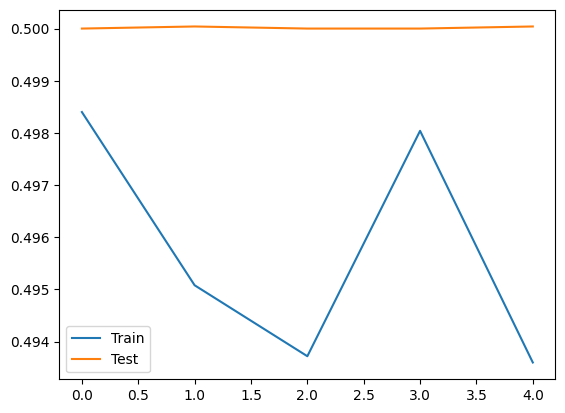

In [42]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.legend()
plt.plot()

[]

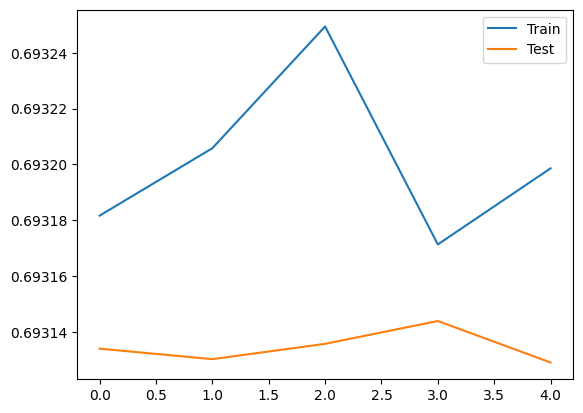

In [43]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.plot()